In [1]:
import os

In [7]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
my_data_dir = '/content/gdrive/My Drive/Projects for kiran/masks2.0/maskdata'

In [48]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
from matplotlib.image import imread

In [57]:
test_path = my_data_dir+'/test'
train_path = my_data_dir+'/train'

In [58]:
test_path

'/content/gdrive/My Drive/Projects for kiran/masks2.0/maskdata/test'

In [59]:
os.listdir(test_path)

['without_mask', 'with_mask']

In [60]:
os.listdir(train_path)

['without_mask', 'with_mask']

In [61]:
os.listdir(train_path+'/without_mask')[0]

'42.jpg'

In [62]:
para_cell = train_path+'/without_mask'+'/15.jpg'

##### Those backward slashes should be between all the files & all the directories

In [63]:
para_cell

'/content/gdrive/My Drive/Projects for kiran/masks2.0/maskdata/train/without_mask/15.jpg'

In [64]:
para_img= imread(para_cell)

In [65]:
# para_img >>> converts the image into an numpy array

para_img.shape

(428, 320, 3)

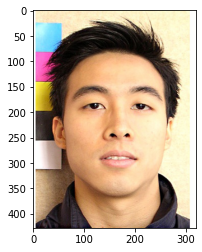

In [66]:
plt.imshow(para_img)

In [67]:
para_img.shape

(428, 320, 3)

In [70]:
os.listdir(train_path+'/with_mask')[0]

'augmented_image_291.jpg'

uninfected_cell_path : /content/gdrive/My Drive/Projects for kiran/masks2.0/maskdata/train/with_mask/augmented_image_291.jpg
uninfected_cell-shape: (428, 320, 3)


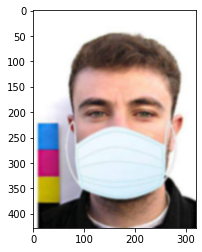

In [73]:
unifected_cell_path = train_path+'/with_mask/'+os.listdir(train_path+'/with_mask/')[0]

print('uninfected_cell_path :', unifected_cell_path)

#...............................................................................................................................

unifected_cell = imread(unifected_cell_path)

print('uninfected_cell-shape:',unifected_cell.shape)

#...............................................................................................................................

plt.imshow(unifected_cell)

**Let's check how many images there are**

In [74]:
len(os.listdir(train_path+'/without_mask'))

40

In [75]:
len(os.listdir(train_path+'/with_mask'))

52

In [76]:
len(os.listdir(test_path+'/without_mask'))

11

In [77]:
len(os.listdir(test_path+'/with_mask'))

22

In [78]:
unifected_cell.shape

(428, 320, 3)

In [79]:
para_img.shape

(428, 320, 3)

In [80]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/with_mask'):
    
    img = imread(test_path+'/with_mask'+'/'+image_filename)
    
    d1,d2,colors = img.shape
    
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


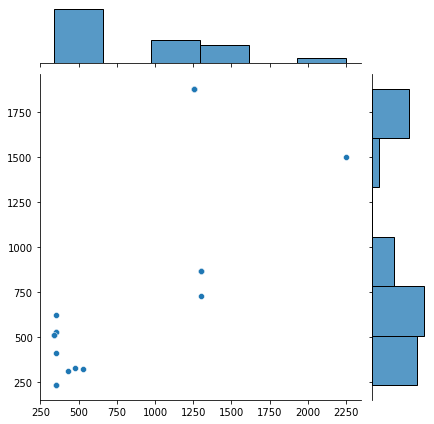

In [81]:
sns.jointplot(dim1, dim2)

In [82]:
np.mean(dim1)

830.4090909090909

In [83]:
np.mean(dim2)

875.8636363636364

In [84]:
image_shape = (340,340,3)

##### When I am preparing the data for the model I willl resize every image to these dimensions

##### If the image is smaller : I can do padding to this image so that it will reach to these dimensions

##### If the image is larger : I can crop it down to these dimensions

---------------------------------------------------------------------------------------------------------------------

### Preparing data for the Model

* There is too much data for us to read all at once in memory.

* We can use some built-in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images

In [85]:
image_shape

(340, 340, 3)

#### `If we choose the image_shape really high we may run out of memory`

* No.of data points are :

In [86]:
340*340*3

346800

##### That means there is too much data and it's not good to feed this everything at once

### Image Manipulation

##### It's usually a good idea to manipulate the images by transformations like `rotation`, `re-sizing`, and `scaling` so that model becomes more robust to different images that it has not seen before.

##### We can use the `ImageDataGenerator` to do this automatically for us

##### Check out the documentation : help(ImageDataGenerator) for a full list of all the parameters we can use here

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [89]:
#...............................................................................................................................

'''
What values we should use for rotation, width_shift, height_shift ?

Well we are dealing with blob data i.e., circular data :

It's ok to rotate the circular image by 180 degrees because it's still the same

It's ok to shift the circular image becuase it's still the same

So, we can use high range values for these circular images or blob data

But when it comes to tasks like facial images :

We can't rotate the face by 180 degrees 

We can't do shifting that much on facial images

For these type of tasks it's best to choose low range values 

'''
#...............................................................................................................................

'''
We can also do rescaling 

If the values of the image pixels are not between 0 and 1 

i.e., (0 to 255) 

we can do rescale them by like 1/255

'''
#...............................................................................................................................


'''
If we increase the width or height of the image 

How we are going to fill these new missing pixel values?

By using the nearest filled values or

By padding them up with 0s etc., 

'''
#...............................................................................................................................

image_gen = ImageDataGenerator(rotation_range=20,               # rotate the image by 20 degrees 
                               width_shift_range=0.10,          # shift the pic width by a max of 5%  
                               height_shift_range=0.10,         # shift the pic height by a max of 5%
                               rescale=1/255,                   # Rescale the image by normalizing it
                               shear_range=0.1,                 # shear means cutting away part of the image (max 10%)
                               zoom_range=0.1,                  # zoom-in by 10% max
                               horizontal_flip=True,            # Allows horizontal and as well as vertical flipping
                               fill_mode='nearest'              # Fill in the missing pixel values with nearest filled values
                               )

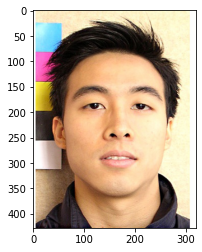

In [90]:
plt.imshow(para_img)            # we took para_img bacause uninfected cell doesn't have a center to see how transformation works

##### We are not going to feed in this raw image to the model instead we are going to feed in the following transformed image :

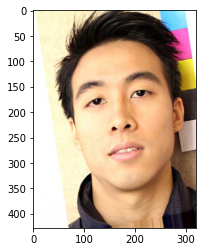

In [91]:
plt.imshow(image_gen.random_transform(para_img))

#### `Setting up our directories in order to flow batches from a directory`

### `Generating many manipulated images from a directory`

* In order to use `.flow_from_directory`, we must organize the images in sub-directories

* This is an absolute requirement , otherwise our method will not work

* The directories should only contain images of one class, so one folder per class of images

------------------------------------------------------------------------------------------------------------------

#### `Structure` :

* Image Data Folder

    * Class 1
    
       * 0.jpg
       
       * 1.jpg
       
       * .....
      
    * Class 2
    
       * 0.jpg
       
       * 1.jpg
       
       * .....
       
    * .......
    
    * Class n  
    
--------------------------------------------------------------------------------------------------------------------------    

###### The above structure should be there for both training_set and test_set

##### No.of folders = No.of Classes >>>>>>>>>>> this is how our model understands the model

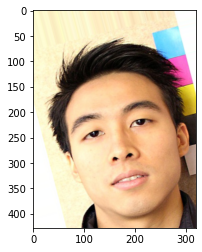

In [92]:
plt.imshow(image_gen.random_transform(para_img))     # this step should be done above structure

In [93]:
image_gen.flow_from_directory(train_path)

Found 92 images belonging to 2 classes.


In [94]:
image_gen.flow_from_directory(test_path)

Found 33 images belonging to 2 classes.


-------------------------------------------------------------------------------------------------------------------------------

### Create a Model

In [95]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

In [96]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 338, 338, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 169, 169, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 167, 167, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 83, 83, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 81, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 102400)            0

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

-------------------------------------------------------------------------------------------------------------------------------

### Training the Model

In [100]:
# help(image_gen.flow_from_directory)

In [101]:
'''
Batch_size is often seen in powers of 2

Larger the hardware, the larger the batch_size we can choose

Smaller the batch_size, the longer the training time takes 

because you are fitting less images at a time

'''

batch_size = 16

##### We have to create two generators

In [102]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 92 images belonging to 2 classes.


In [103]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 33 images belonging to 2 classes.


In [104]:
train_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
results = model.fit_generator(train_image_gen,epochs=4,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/4
6/6 [==============================] - 25s 4s/step - loss: 3.0279 - accuracy: 0.4891 - val_loss: 0.6963 - val_accuracy: 0.3333
Epoch 2/4
6/6 [==============================] - 19s 3s/step - loss: 0.6956 - accuracy: 0.4783 - val_loss: 0.6710 - val_accuracy: 0.6970
Epoch 3/4
6/6 [==============================] - 17s 3s/step - loss: 0.6928 - accuracy: 0.5978 - val_loss: 0.6299 - val_accuracy: 0.6667
Epoch 4/4
6/6 [==============================] - 18s 3s/step - loss: 0.6659 - accuracy: 0.6196 - val_loss: 0.5913 - val_accuracy: 0.6667


---------------------------------------------------------------------------------------------------------------------------

### Model Evaluation

In [107]:
metrics = pd.DataFrame(model.history.history)

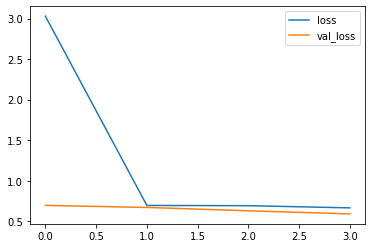

In [108]:
metrics[['loss','val_loss']].plot()

In [109]:
model.metrics_names

['loss', 'accuracy']

In [110]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.5879383683204651, 0.6666666865348816]

In [111]:
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [112]:
pred_probabilities

array([[0.35637572],
       [0.29889682],
       [0.31631225],
       [0.27217424],
       [0.34545147],
       [0.38802257],
       [0.31309807],
       [0.3257705 ],
       [0.28170773],
       [0.32168812],
       [0.3087681 ],
       [0.3293574 ],
       [0.286322  ],
       [0.44628924],
       [0.27362156],
       [0.32804337],
       [0.37743202],
       [0.29575557],
       [0.36945617],
       [0.3339011 ],
       [0.2752448 ],
       [0.36980754],
       [0.42977896],
       [0.40800345],
       [0.40356547],
       [0.35823172],
       [0.3813526 ],
       [0.41874903],
       [0.38725382],
       [0.35796088],
       [0.2846349 ],
       [0.4161274 ],
       [0.34944463]], dtype=float32)

#### `Notice that instead of getting class calls we got the probabilities`

In [113]:
predictions = pred_probabilities > 0.5

In [114]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

#### `Numpy can treat this True/False as 0 and 1`

#### `Hence we can directly pass this predictions variable into our confusion matrix and classification report`

In [115]:
len(predictions)

33

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

##### `Our actual test classes :`

In [117]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [118]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        22
           1       0.00      0.00      0.00        11

    accuracy                           0.67        33
   macro avg       0.33      0.50      0.40        33
weighted avg       0.44      0.67      0.53        33



In [119]:
confusion_matrix(test_image_gen.classes,predictions)

array([[22,  0],
       [11,  0]])

-------------------------------------------------------------------------------------------------------------------------------

##### `Good thing about this model is :`

##### We have got the probablities of the predicted classes i.e, in our case if the prob_pred is > 50% that means the predicted value belongs to class 1 : uninfected

##### This is going to serve the doctor as an assistant like we can increase the threshold to prob_pred > 80% and in this way we can make our own sort of precision and recall trade-off.

##### Like we can alert the doctor if the prob_pred < 0.2 i.e., highly infected and let the doctor looks manually at everything else

##### In this way we can also manage type-1 and type-2 errors

-------------------------------------------------------------------------------------------------------------------------------

### Predicting on an Image

In [120]:
para_cell

'/content/gdrive/My Drive/Projects for kiran/masks2.0/maskdata/train/without_mask/15.jpg'

##### We can view this image by tensorflow built-in function

In [121]:
from tensorflow.keras.preprocessing import image

In [122]:
type(image.load_img(para_cell))

PIL.JpegImagePlugin.JpegImageFile

##### This is a kind of pillow image file and not an array

##### And we can also reshape the image size

In [123]:
my_image = image.load_img(para_cell,target_size=image_shape)

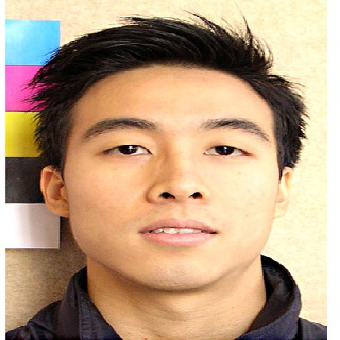

In [124]:
my_image

##### Let's say the doctor has sent a email with an image attached to it and we have to train the model or just load the model and we will use the above line my_image and check what our image size is and modify it accordingly

##### Now let' s say we have got an image and we have to read and pass it to the model

In [125]:
type(my_image)

PIL.Image.Image

In [126]:
my_image_arr = image.img_to_array(my_image)

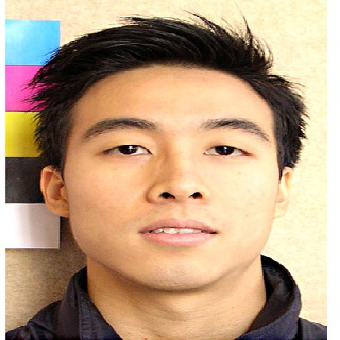

In [127]:
my_image      # original image that we got to predict

In [128]:
type(my_image_arr)

numpy.ndarray

In [129]:
my_image_arr.shape

(340, 340, 3)

##### My model expects to get an image with this shape : (1, 340, 340, 3)     

* (num_batches/samples, width, height, color_channels)

In [130]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [131]:
my_image_arr.shape

(1, 340, 340, 3)

In [132]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [133]:
train_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [134]:
test_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}